In [2]:
# Zomato Data Analysis Project

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Step 2: Load the Dataset
# Make sure "zomato.csv" is in the same folder as this script,
# or update the path accordingly.
# Added on_bad_lines='skip' to skip problematic lines
# Changed engine to 'python' to handle potential parsing errors
df = pd.read_csv("/zomato.csv", encoding='latin-1', on_bad_lines='skip', engine='python')


In [7]:
# Step 3: Data Cleaning
df.drop_duplicates(inplace=True)
df.dropna(subset=['rate', 'location', 'cuisines'], inplace=True)

# A) Clean 'rate' column safely
df['rate'] = df['rate'].astype(str).apply(lambda x: x.split('/')[0].strip())
# Replace any 'NEW', '-', 'nan', or empty strings with NaN
df['rate'].replace(['NEW', '-', 'nan', ''], np.nan, inplace=True)
# Drop rows where rate is still NaN
df.dropna(subset=['rate'], inplace=True)
# Convert to float
df['rate'] = df['rate'].astype(float)

In [8]:
# B) Clean 'approx_cost(for two people)' column safely
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].replace(['nan', ''], np.nan)
df.dropna(subset=['approx_cost(for two people)'], inplace=True)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

# C) (Optional) Fix potential encoding issues in 'name'
#    Some restaurant names may show weird characters;
#    this attempts to re-encode them correctly.
df['name'] = df['name'].apply(
    lambda x: x.encode('latin-1').decode('utf-8', 'ignore') if isinstance(x, str) else x
)

# D) Drop columns we won’t use for analysis
#    You can keep them if you plan on doing review/text analysis later.
df.drop(['url', 'address', 'phone', 'reviews_list', 'menu_item'], axis=1, inplace=True)

In [9]:
# Step 4: EDA – Basic Analysis
print("Top 5 Locations with Most Restaurants:")
print(df['location'].value_counts().head(), "\n")

print("Top 5 Cuisines Served:")
print(df['cuisines'].value_counts().head(), "\n")

Top 5 Locations with Most Restaurants:
location
HSR                  1176
BTM                  1080
Electronic City       836
Bannerghatta Road     771
JP Nagar              692
Name: count, dtype: int64 

Top 5 Cuisines Served:
cuisines
North Indian                           740
North Indian, Chinese                  709
South Indian                           456
Bakery, Desserts                       230
South Indian, North Indian, Chinese    218
Name: count, dtype: int64 



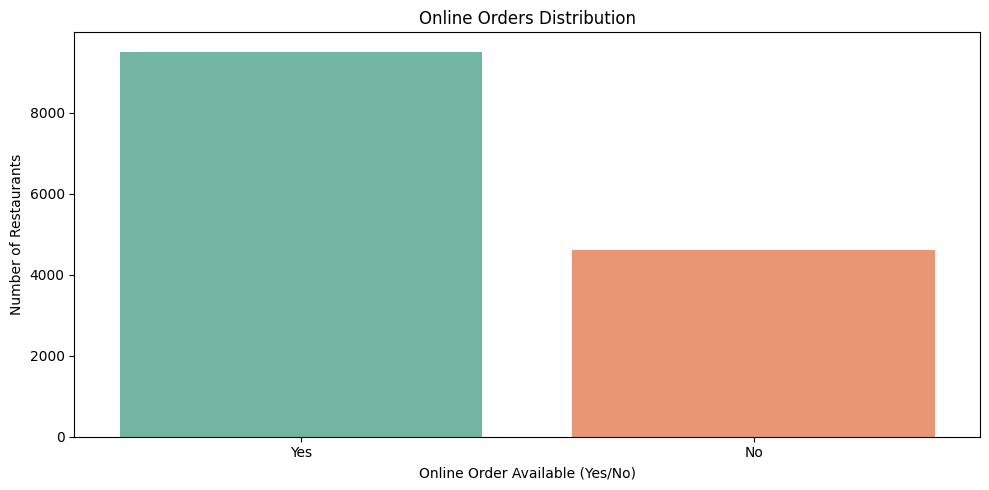

In [10]:
# Step 5: Visualizations

# 5.1: Online Orders Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='online_order', palette='Set2')
plt.title("Online Orders Distribution")
plt.xlabel("Online Order Available (Yes/No)")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()

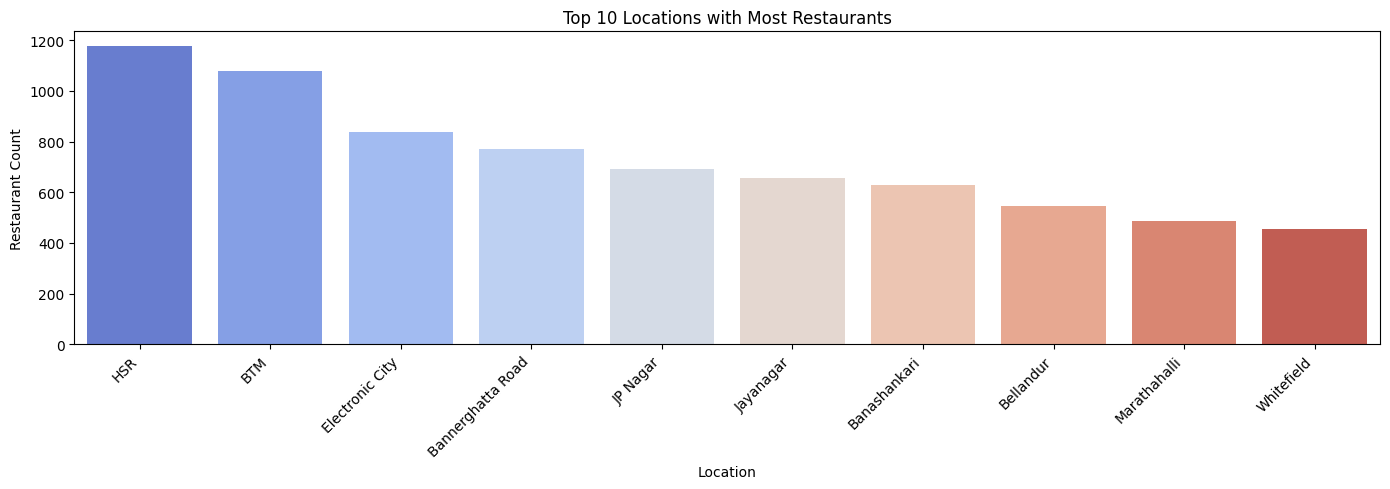

In [11]:
# 5.2: Top 10 Locations by Restaurant Count
plt.figure(figsize=(14, 5))
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.index, y=top_locations.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Locations with Most Restaurants")
plt.xlabel("Location")
plt.ylabel("Restaurant Count")
plt.tight_layout()
plt.show()

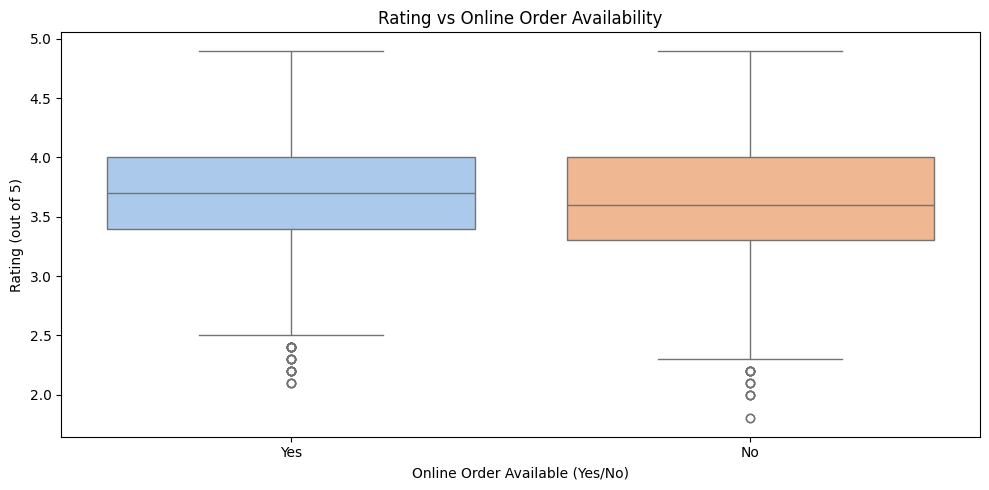

In [12]:
# 5.3: Rating vs Online Order Availability
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='online_order', y='rate', palette='pastel')
plt.title("Rating vs Online Order Availability")
plt.xlabel("Online Order Available (Yes/No)")
plt.ylabel("Rating (out of 5)")
plt.tight_layout()
plt.show()

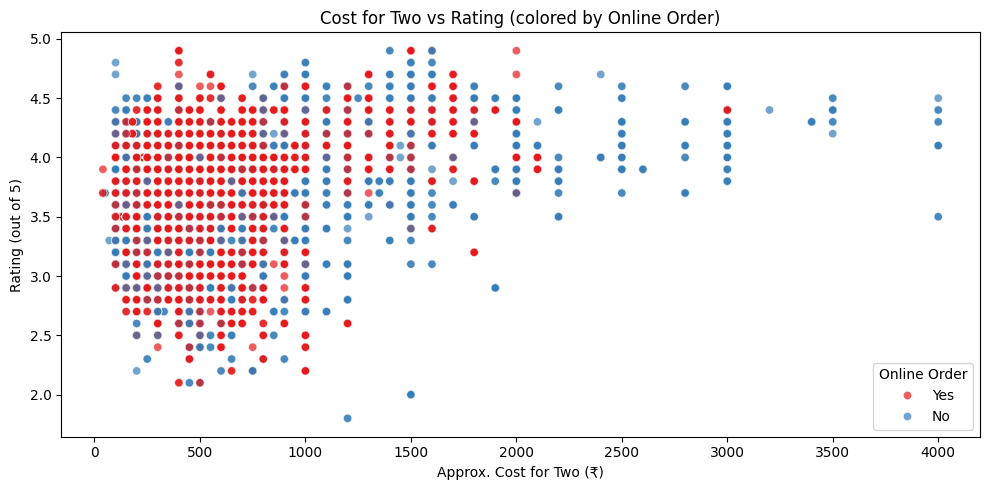

In [13]:
# 5.4: Cost vs Rating Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df,
    x='approx_cost(for two people)',
    y='rate',
    hue='online_order',
    palette='Set1',
    alpha=0.7
)
plt.title("Cost for Two vs Rating (colored by Online Order)")
plt.xlabel("Approx. Cost for Two (₹)")
plt.ylabel("Rating (out of 5)")
plt.legend(title="Online Order")
plt.tight_layout()
plt.show()

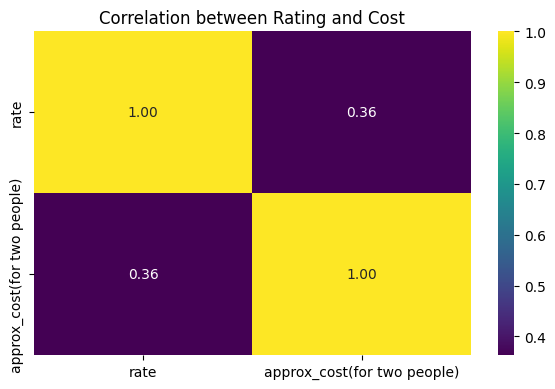

'\n### 🔍 Key Insights:\n- Restaurants in areas like Koramangala and BTM Layout appear most frequently.\n- “Yes” for online_order tends to correlate with slightly higher ratings.\n- There is a mild positive correlation between cost for two and rating.\n- North Indian and Chinese cuisines dominate across most locations.\n'

In [14]:
# Step 6: Correlation Heatmap (Numeric Columns Only)
numeric_df = df[['rate', 'approx_cost(for two people)']]
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation between Rating and Cost")
plt.tight_layout()
plt.show()

# Step 7: (Optional) Save Cleaned Data for Future Use
# df.to_csv("cleaned_zomato.csv", index=False)

# Step 8: Conclusion (as comments or markdown in Jupyter)
"""
### 🔍 Key Insights:
- Restaurants in areas like Koramangala and BTM Layout appear most frequently.
- “Yes” for online_order tends to correlate with slightly higher ratings.
- There is a mild positive correlation between cost for two and rating.
- North Indian and Chinese cuisines dominate across most locations.
"""
